In [128]:
import yt
import numpy             as np

import matplotlib.pyplot as plt
from   matplotlib    import cm


from   astropy.table import QTable
import astropy.constants as c
import astropy.units     as u


dir_main    = "/mnt/sdceph/users/smenon/RHDSphereKrome/" 
dirs_prfx   = "GalaxyICsHydroDef"

dir_control = dir_main +dirs_prfx
dir_allr    = dir_main +dirs_prfx +"AllBands"
dir_sne     = dir_main +dirs_prfx +"SNeOnly"
dir_both    = dir_main +dirs_prfx +"SNeRHD"


fils_prfx   = "/RHDTurb_hdf5_"
ftype_plot  = fils_prfx +"plt_cnt_"
# ftype_part  = fils_prfx +"part_"
file_num    = "{:04d}"

dirs        = [dir_control, dir_allr, dir_sne, dir_both]
Ns_done     = [201,         381,      130,     63]

In [2]:
tplt_0_0_0000 = dirs[0]+ftype_plot+file_num.format(0)
tplt_0_0_0100 = dirs[0]+ftype_plot+file_num.format(100)

In [3]:
plots_4x = [[dir+ftype_plot+file_num.format(n) for n in range(N)             ]
                                               for dir,N in zip(dirs,Ns_done)]
                                                 
                                              #the order of the for statements are in reverse order of hierarchy
                                              #ie the first level splits into plot/particle files, 
                                              #then into the four cases, 
                                              #then into timeslices

In [4]:
lasts = [file for pfiles in plots_4x
             for file  in pfiles[62:63]]

In [105]:
rhos = [yt.load(pfile).all_data()['dens'].in_units('solMass/pc**3')      for pfile in lasts]
Ts   = [yt.load(pfile).all_data()['temp'].in_units('K')            for pfile in lasts]
Ms   = [yt.load(pfile).all_data()['cell_mass'].in_units('solMass') for pfile in lasts]

yt : [INFO     ] 2025-02-06 14:08:03,633 Particle file found: RHDTurb_hdf5_part_0062
yt : [INFO     ] 2025-02-06 14:08:03,682 Parameters: current_time              = 195550730562138.06
yt : [INFO     ] 2025-02-06 14:08:03,684 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-02-06 14:08:03,686 Parameters: domain_left_edge          = [-4.31995267e+21 -4.31995267e+21 -4.31995267e+21]
yt : [INFO     ] 2025-02-06 14:08:03,688 Parameters: domain_right_edge         = [4.31995267e+21 4.31995267e+21 4.31995267e+21]
yt : [INFO     ] 2025-02-06 14:08:03,689 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-02-06 14:08:04,968 Particle file found: RHDTurb_hdf5_part_0062
yt : [INFO     ] 2025-02-06 14:08:05,016 Parameters: current_time              = 195859880042294.62
yt : [INFO     ] 2025-02-06 14:08:05,018 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-02-06 14:08:05,020 Parameters: domain_left_edge          = [-4.31995267e+21 -4.319

In [6]:
field_list = np.array(yt.load(tplt_0_0_0000).derived_field_list)

yt : [INFO     ] 2025-02-06 13:40:18,818 Particle file found: RHDTurb_hdf5_part_0000
yt : [INFO     ] 2025-02-06 13:40:18,868 Parameters: current_time              = 0.0
yt : [INFO     ] 2025-02-06 13:40:18,870 Parameters: domain_dimensions         = [16 16 16]
yt : [INFO     ] 2025-02-06 13:40:18,872 Parameters: domain_left_edge          = [-4.31995267e+21 -4.31995267e+21 -4.31995267e+21]
yt : [INFO     ] 2025-02-06 13:40:18,873 Parameters: domain_right_edge         = [4.31995267e+21 4.31995267e+21 4.31995267e+21]
yt : [INFO     ] 2025-02-06 13:40:18,875 Parameters: cosmological_simulation   = 0


In [7]:
types = ['flash','gas','index']

In [8]:
[(type,i) for type in types
          for i in range(1,len(field_list)-1,) 
          if (field_list[i][0] == type) & (field_list[i-1][0] != type) | (field_list[i][0] == type) & (field_list[i+1][0] != type)]

[('flash', 41), ('gas', 42), ('gas', 144), ('index', 145)]

In [ ]:
#0-41 flash, 42-144 gas, 145-170 index

In [96]:
field_list[41]

array(['flash', 'z'], dtype='<U35')

In [95]:
len(field_list)

170

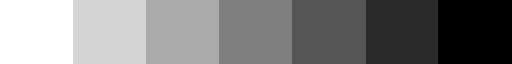

In [130]:
cm.binary.resampled(7)

In [31]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'

In [90]:
colors_4x = [(0.,0.,0.),
             (0.85,0.7,0.),
             (0.1,0.1,0.7),
             (0.1,0.6,0.1)]

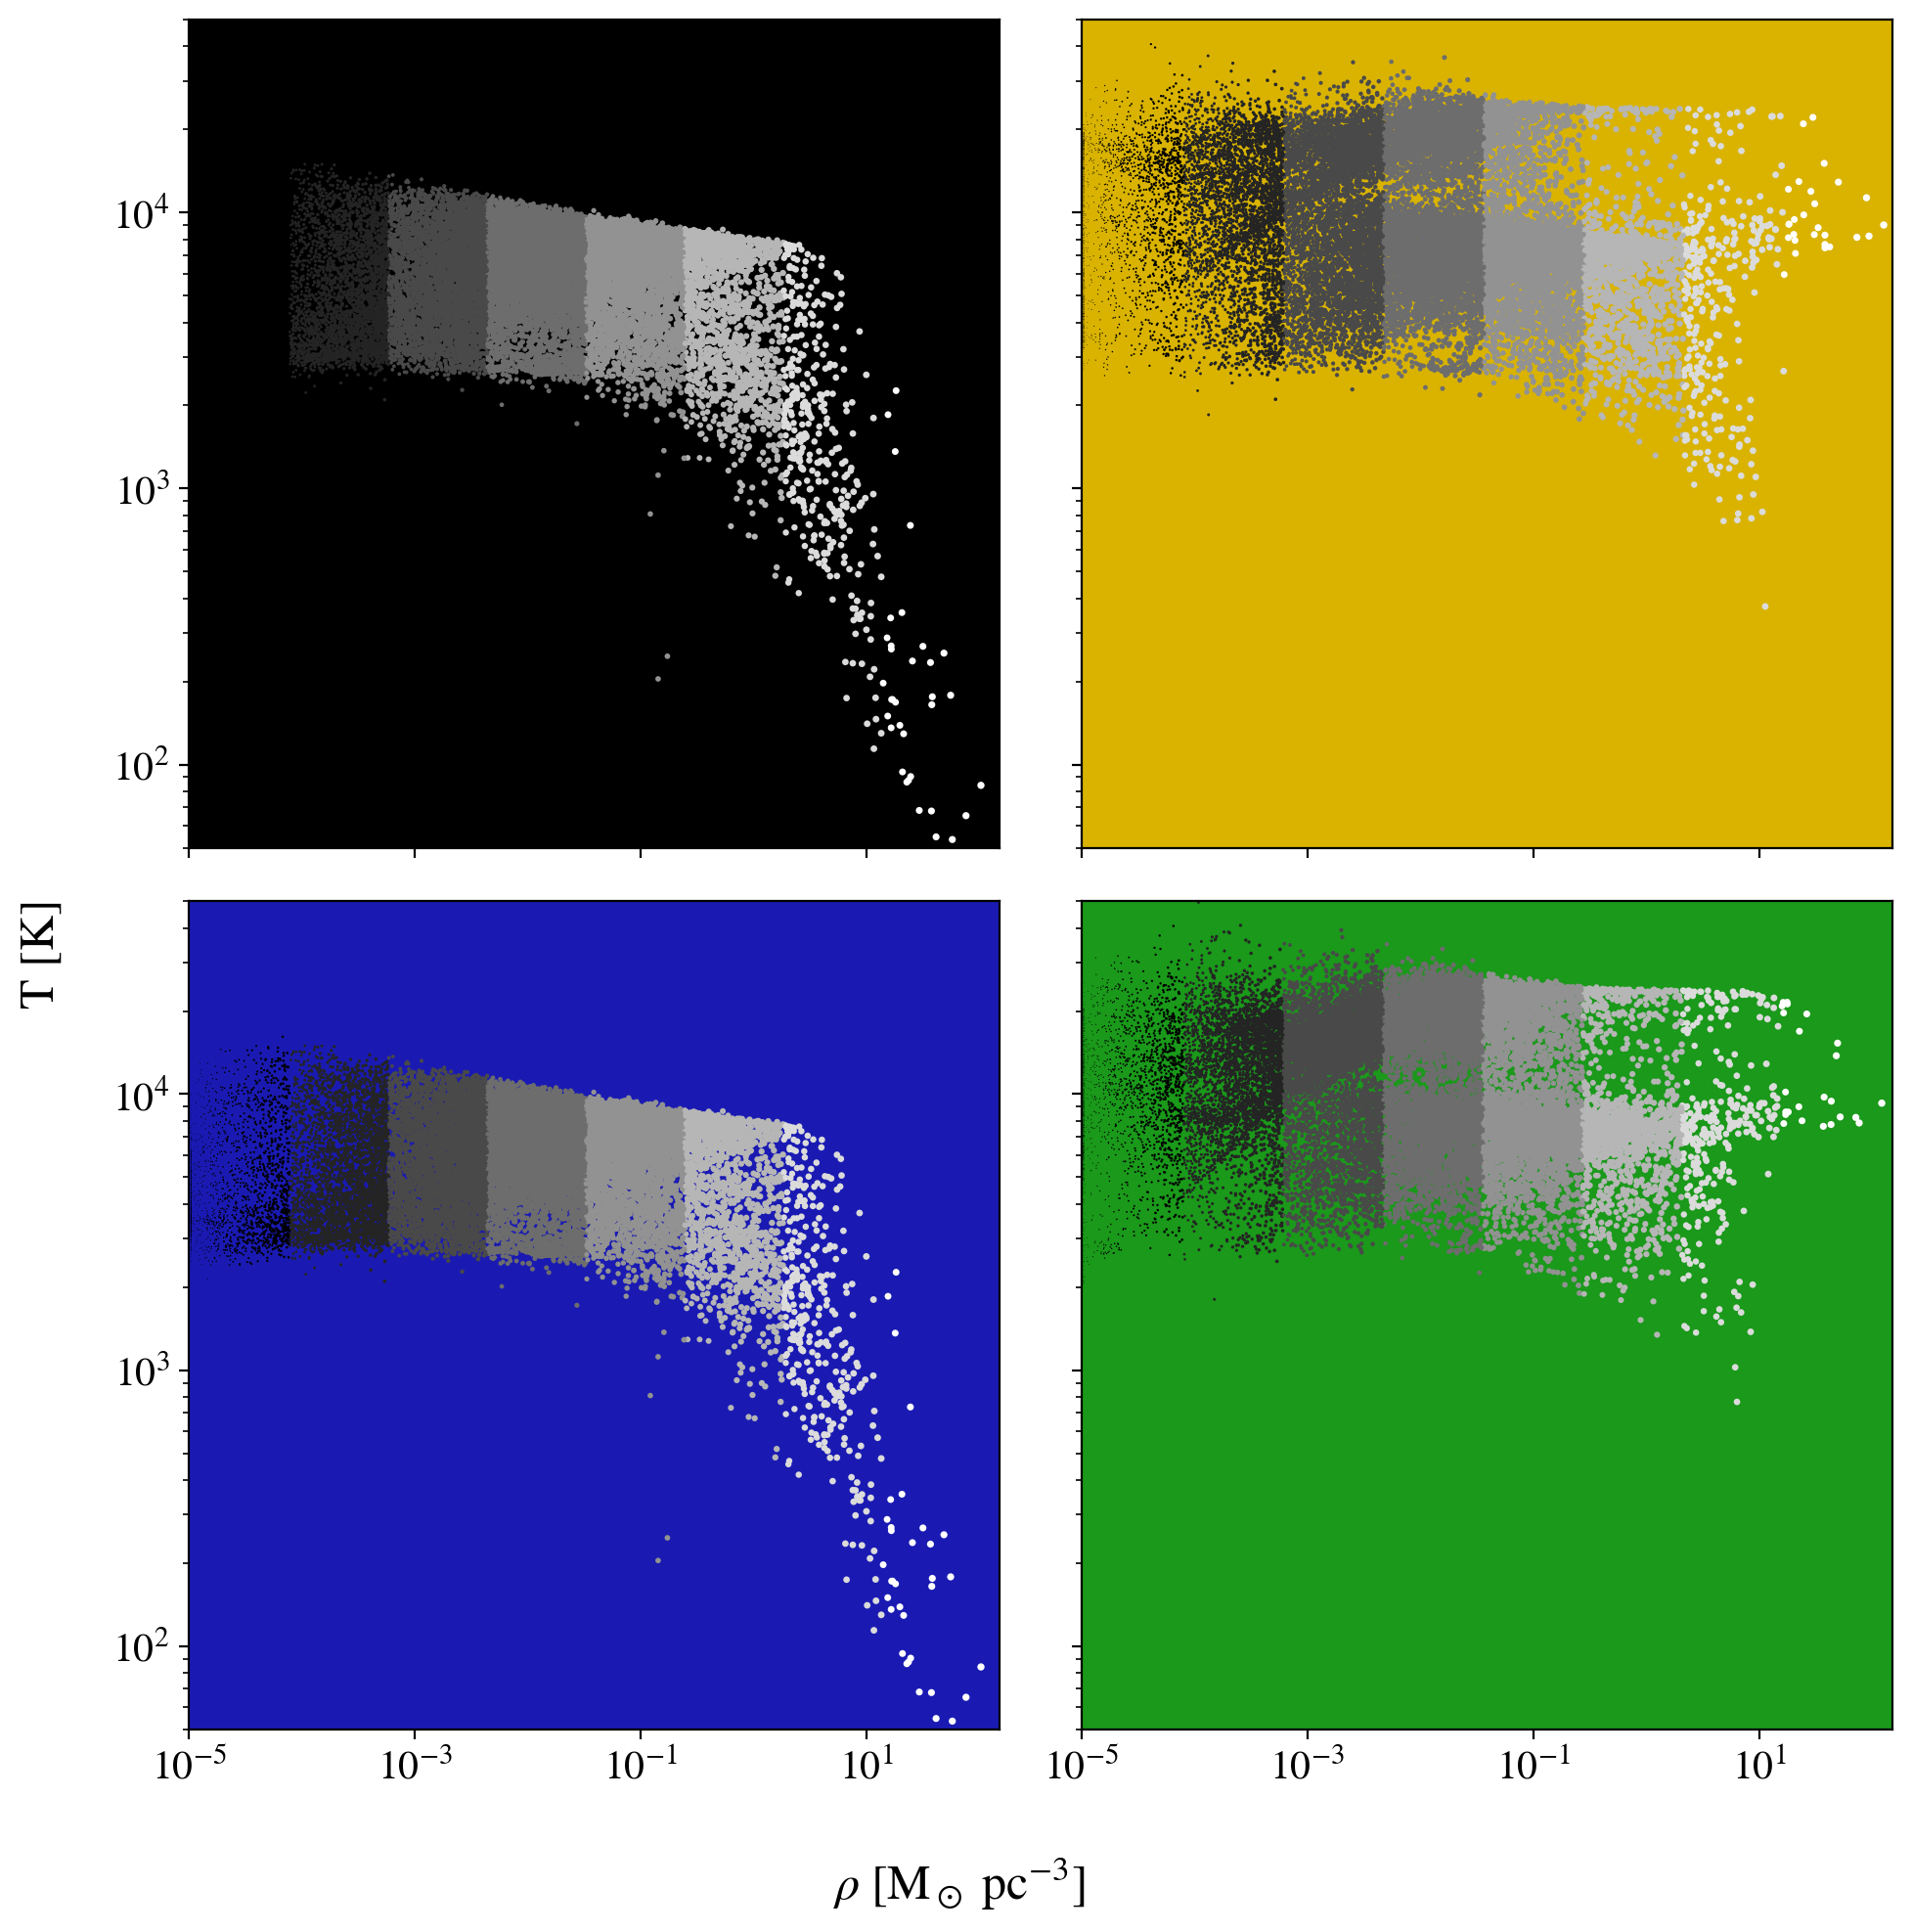

In [149]:
fig,axs = plt.subplots(2,2,dpi=200,figsize=(10,10))


sparse = 79
for ax,rho,T,M,case,clr in zip(axs.flat,
                           rhos,
                           Ts,
                           Ms,
                           ['control','radiation','supernova','r+s'],
                           colors_4x):
    
    im = ax.scatter(rho[::sparse],T[::sparse],
                    c=M[::sparse],
                    s=1+np.log10(M[::sparse]),
                    # s=7e-2,
                    norm='log',
                    cmap=cm.binary_r.resampled(8),
                    # alpha=0.6,
                    linewidth=0.
                    # vmin=1e0,vmax=1e7
                   )
    ax.loglog()
    ax.set_facecolor(clr)
    
    ax.set_xlim(1e-5,150)
    ax.set_ylim(50,5e4)
    
    # ax.set_xticks([1e-27,1e-23,1e-19])
    # ax.set_yticks([15,1500,150000])
    
    # ax.set_title(case)
    ax.label_outer()

# fig.colorbar(im,ax=axs.flat[0],
#              label = r'$M_\mathrm{gas}\ [M_\odot$]',
#              shrink=0.5,
#              ticks=[1e0,1e2,1e4,1e6],
#              # pad=-0.1,
#              orientation='horizontal',
#              # color='white'
#             )

plt.subplots_adjust(wspace=1e-2,
                    hspace=2e-2)

fig.supxlabel(r'$\rho \ [\mathrm{M_\odot\ pc^{-3}}]$')
fig.supylabel('T [K]')

fig.tight_layout()

# fig.savefig('ozob_TvsRho_t62',bbox_inches='tight')

#stitched together the colorbar on canva